In [36]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold

In [37]:
filename = '/content/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3,random_state=42)

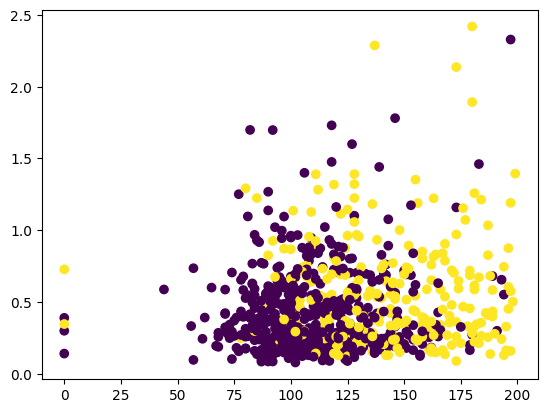

In [39]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['plas'],dataframe['pedi'],c=dataframe['class'])
#try plot with other features as well mass and pedi

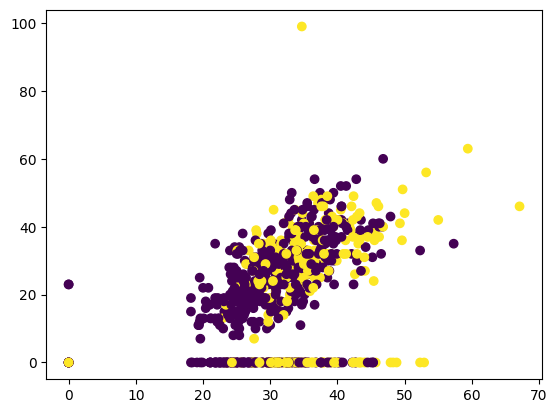

In [40]:
plt.scatter(dataframe['mass'],dataframe['skin'],c=dataframe['class'])

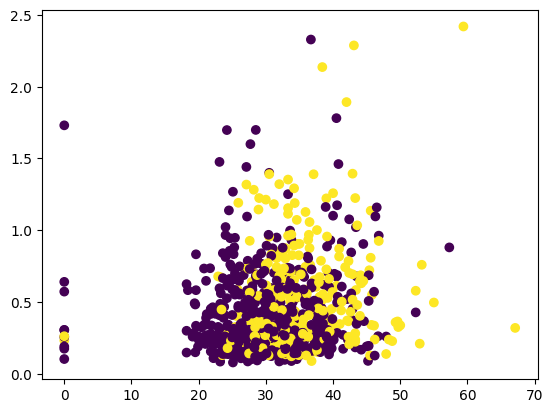

In [41]:
plt.scatter(dataframe['mass'],dataframe['pedi'],c=dataframe['class'])

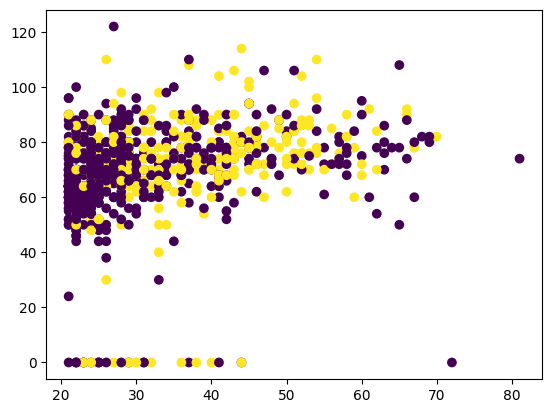

In [42]:
plt.scatter(dataframe['age'],dataframe['pres'],c=dataframe['class'])

In [48]:
clf = SVC(kernel='rbf',gamma=0.001)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred)*100
print("Accuracy= ",acc)
confusion_matrix(y_test,y_pred)

Accuracy=  70.56277056277057


array([[121,  30],
       [ 38,  42]])

In [46]:
# gamma = 0.01
((143+9)/(143+9+71+8))*100

65.80086580086581

In [49]:
# gamma = 0.001
(121+42)/(121+42+30+38)*100

70.56277056277057

# **### Grid Search CV for Hyperparameter Tuning**

In [59]:
num_folds = 10
kfold = KFold(n_splits=num_folds)

In [60]:
# to get optimal value of gamma use grid search cv
clf = SVC()
# can put ['linear','rbf','poly'], give range for gamma i.e. C as a regularization parameter. Best out of it will be selected by algorithm. rbf-radial basis function
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5,1,0.001,0.0001],'C':[1,15,14,13,12,11,10,0.1] }] # 6 X 8 =48 models will be created and will give best out of it.
gsv = GridSearchCV(clf,param_grid,cv=kfold)
gsv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001],
                          'kernel': ['rbf']}])

In [61]:
gsv.best_params_ , gsv.best_score_ # 73% accuracy

({'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}, np.float64(0.7616701607267645))

In [65]:
clf = SVC(C=10,gamma=0.0001,kernel='rbf') # can change kernel and check accuracy
clf.fit(X_train , y_train) #build model
y_pred = clf.predict(X_test)#predict on test dataset

acc = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 73.59307359307358


array([[120,  31],
       [ 30,  50]])

In [54]:
(120+50)/(120+50+30+31) # accuracy by confusion matrix

0.7359307359307359